# Linear Regression with Regularization

### 1. Introduction

In this notebook, we explore advanced topics in linear regression with regularization techniques using Python and `sklearn`.

We will cover:
- Ridge, Lasso, ElasticNet Regularization

We use the **Diabetes dataset** from `sklearn` as our case study.

---
Let's begin by importing the dataset and libraries.

### 2. Load & Explore Dataset

### Dataset Overview
The Diabetes dataset contains 10 baseline variables (age, sex, BMI, etc.) for diabetes patients and a quantitative measure of disease progression after one year.

We will use this dataset to demonstrate various linear regression techniques.



In [1]:
# import libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load diabetes dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X['target'] = y
X.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### 3. Baseline Linear Regression

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X.drop('target', axis=1), y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f'R²: {r2_score(y_test, y_pred):.4f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')

R²: 0.4526
MSE: 2900.19


### 4. Ridge Regression (L2 Regularization)

Ridge Regression is a type of linear regression that introduces a regularization parameter to reduce model complexity and prevent overfitting, especially when multicollinearity is present among predictors.

It modifies the Ordinary Least Squares (OLS) loss function by adding a penalty term proportional to the square of the magnitude of the coefficients.

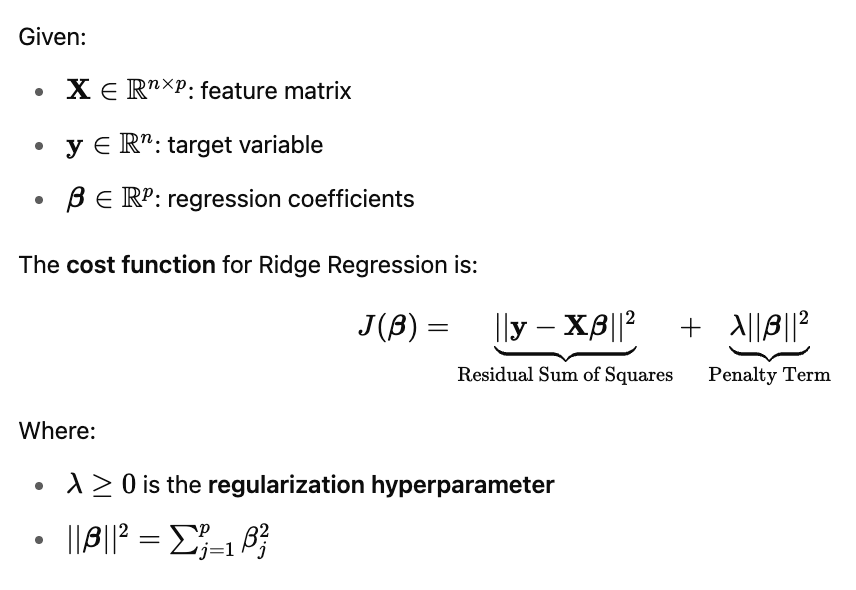
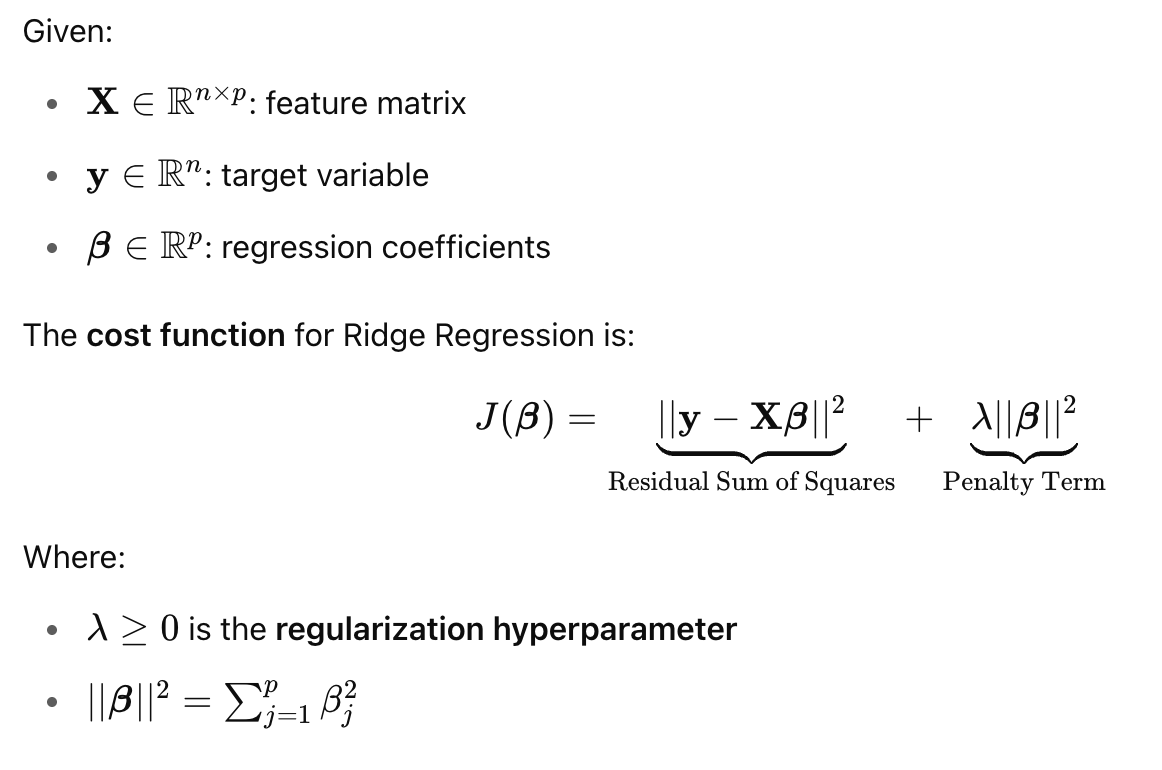

**Intuition behind Ridge Regession**

- **Overfitting Control**: By penalizing large coefficients, ridge regression shrinks them, making the model less sensitive to data fluctuations.

- **Multicollinearity**: When predictors are highly correlated, OLS estimates can have high variance. Ridge stabilizes them.

- **Bias-Variance Tradeoff**: Ridge increases bias but reduces variance — often leading to lower total error on unseen data.

In [3]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_ridge = ridge.predict(X_test)

print(f'Ridge R²: {r2_score(y_test, y_ridge):.4f}')

Ridge R²: 0.4192


Hyperparameter Tuning with CrossValidation

In [5]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train, y_train)
y_ridge = ridge.predict(X_test)

print(f'Ridge R²: {r2_score(y_test, y_ridge):.4f}')

Ridge R²: 0.4609


**1. What is the role of the regularization parameter λ in Ridge Regression ?**

It controls the penalty on the magnitude of coefficients.

    λ=0     :    Ridge = OLS
    λ → ∞   :    Coefficients shrink to 0

**2. Why is Ridge Regression preferred over OLS in the presence of multicollinearity?**

OLS can produce unstable, large coefficients.

Ridge stabilizes the solution by adding bias, which lowers variance.

**3. Does Ridge Regression perform feature selection?**

No. It shrinks coefficients but does not eliminate them.

For feature selection, Lasso Regression is better.

**4. What happens to Ridge coefficients when features are standardized?**

Standardization ensures all features contribute equally to the regularization penalty.

Without it, features with larger scales dominate the penalty term.

**5. When to Use Ridge Regression**
- When there is multicollinearity
- When the model overfits (i.e., high variance on test data)
- When the number of predictors p is close to or greater than the number of observations n
- When you don't require sparse models (i.e., all features contribute)



### 5. Lasso Regression (L1 Regularization)

Lasso Regression (short for Least Absolute Shrinkage and Selection Operator) is a linear regression technique that adds L1 regularization to the loss function. 

Its main strength lies in its ability to perform automatic feature selection by shrinking some coefficients to exactly zero.

This makes Lasso especially useful when we expect only a subset of the predictors to be truly important.

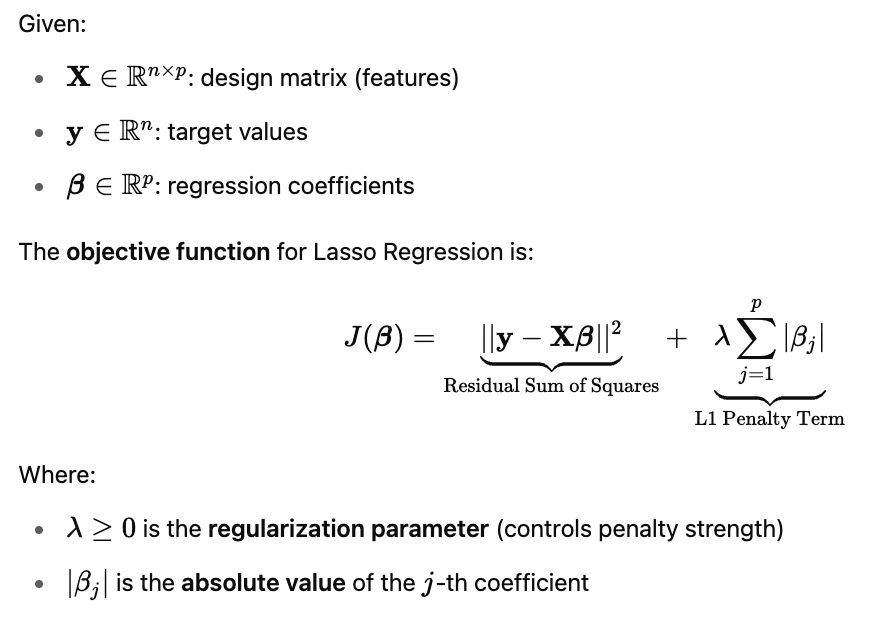

**Intuition behind Lasso Regression**

- Lasso's L1 constraint forms a diamond-shaped constraint region in coefficient space.

- The corners of the diamond often intersect the OLS solution path, pushing some coefficients to exactly zero.

- In contrast, Ridge has a circular constraint region, which shrinks but doesn't eliminate coefficients.

This explains why Lasso leads to sparse models, while Ridge does not.

**How Lasso Achieves Feature Selection**

- Lasso imposes a penalty on the absolute values of the coefficients. 

- Because the L1 penalty is not differentiable at zero, it allows some coefficients to be shrunk exactly to zero during optimization.

- This results in a sparse solution, effectively selecting a subset of predictors.

In [9]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_lasso = lasso.predict(X_test)

print(f'Lasso R²: {r2_score(y_test, y_lasso):.4f}')

Lasso R²: 0.3576


Hyperparameter Tuning with CrossValidation

In [11]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)
lasso.fit(X_train, y_train)
y_lasso = lasso.predict(X_test)

print(f'Lasso R²: {r2_score(y_test, y_lasso):.4f}')

Lasso R²: 0.4719


**Optimization**

Lasso does not have a closed-form solution. Common optimization techniques include:

- Coordinate Descent (most commonly used)

- Least Angle Regression (LARS) for small/medium data

- Subgradient Methods

**1. What is the key difference between Lasso and Ridge?**

- Lasso uses L1 penalty; Ridge uses L2 penalty.

- Lasso can shrink coefficients to zero, making it good for feature selection.

**2. Why can Lasso perform feature selection but Ridge cannot?**

- The L1 penalty is not differentiable at zero, which makes it possible for the optimization to set coefficients exactly to zero.

- L2 is smooth around zero, so it only shrinks coefficients, never zeroes them out.

**3. What is the effect of the regularization parameter λ?**

Larger λ: More coefficients are driven to zero (more regularization).

Smaller λ: Model approaches OLS.

**4. What happens when you have highly correlated features?**

Lasso tends to select one feature from a group and ignore the others.

This may not be ideal if all correlated features are important.

**5. What are limitations of Lasso Regression?**

Model instability with high collinearity (Ridge is more stable).

Performance drops when the number of predictors > number of samples and predictors are highly correlated.

**6. How does Lasso help with overfitting?**

By removing irrelevant features, Lasso reduces model complexity and hence variance, leading to better generalization.

**When to Use Lasso Regression**

- When you expect only a few predictors are important (sparse signal).

- When feature selection is needed.

- When you want a simple, interpretable model.

- In high-dimensional problems (e.g., p>n).

### 6. Elastic Net Regression – Theory and Concepts

Elastic Net Regression is a regularized linear regression technique that combines the strengths of Ridge (L2) and Lasso (L1) regularization. 

It is especially useful when dealing with high-dimensional data and correlated predictors.

The motivation for Elastic Net comes from the limitations of Lasso:

Lasso tends to select one variable from a group of correlated variables and ignore the rest.

It can perform poorly when p>n (more features than observations).

Elastic Net addresses this by blending L1 and L2 penalties, leveraging the feature selection power of Lasso and the stability of Ridge.

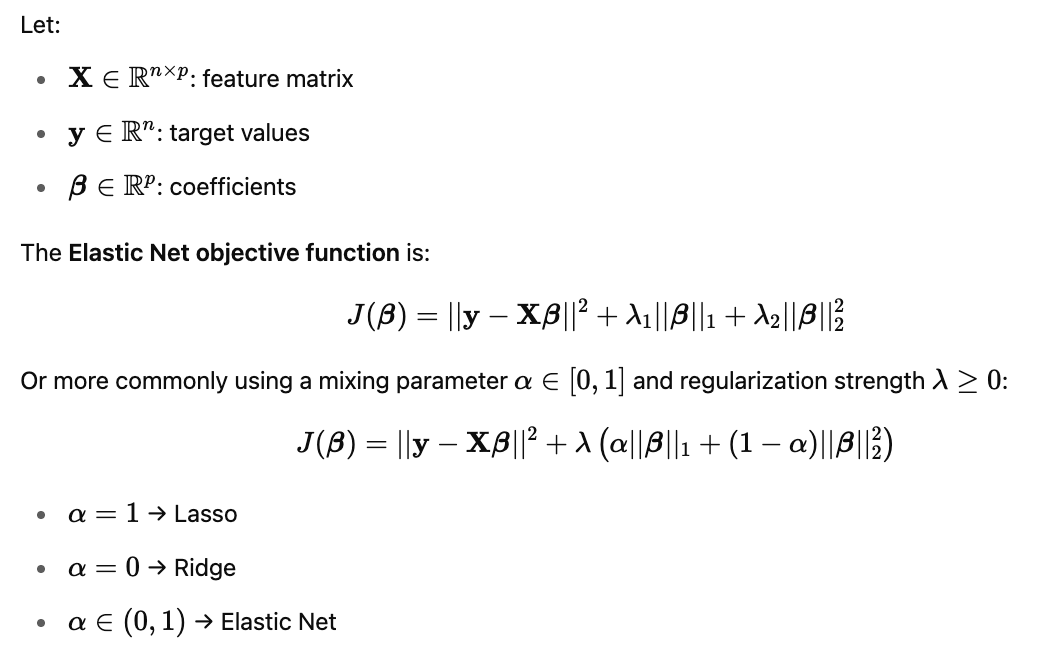

Hyperparameters

    λ: Controls the overall strength of regularization
    α: Controls the balance between L1 and L2

These hyperparameters are usually tuned using cross-validation.

In [12]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=1.0)
elasticnet.fit(X_train, y_train)
y_elasticnet = elasticnet.predict(X_test)

print(f'ElasticNet R²: {r2_score(y_test, y_elasticnet):.4f}')

ElasticNet R²: -0.0025


Hyperparameter Tuning With Cross Validation

In [13]:
from sklearn.linear_model import ElasticNetCV
elasticnet = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.9], alphas=[0.01, 0.1, 1.0], cv=5)
elasticnet.fit(X_train, y_train)
y_elasticnet = elasticnet.predict(X_test)

print(f'ElasticNet R²: {r2_score(y_test, y_elasticnet):.4f}')

ElasticNet R²: 0.4569


| Scenario                                    | Behavior                                |
| ------------------------------------------- | --------------------------------------- |
| Many correlated features                    | Selects groups of correlated predictors |
| Sparse model needed                         | Uses L1 to zero-out some coefficients   |
| High-dimensional data $(p > n)$             | Ridge helps with stability              |
| Lasso fails to select all relevant features | Elastic Net can fix it                  |


### Intuition

- Lasso (L1) encourages sparsity → good for feature selection

- Ridge (L2) encourages shrinkage → good for dealing with multicollinearity

- Elastic Net combines the diamond-shaped constraint of Lasso and the circular constraint of Ridge. 

- The result is a rounded diamond region. 

- The corners (from L1) still allow zero coefficients, while the smoothness (from L2) encourages group selection.

- Selects a sparse subset of features

- Does not arbitrarily drop correlated variables

- Is more robust and stable than pure Lasso in many real-world scenarios



When to Use Elastic Net

- When you have many features, especially if they are correlated

- When Lasso is unstable or too aggressive in shrinking features

- When you want to combine sparsity and stability

- For automatic feature selection in high-dimensional problems



**1. What problem does Elastic Net solve that Lasso cannot?**

Lasso fails when predictors are highly correlated or when  p>n. 

Elastic Net includes the L2 penalty to stabilize the solution and encourages group selection.

**2. Why use both L1 and L2 penalties?**

L1 performs feature selection, L2 adds stability and helps manage multicollinearity.

**3. What is the role of α in Elastic Net?**

α is the mixing parameter:

    α=1 → equivalent to Lasso
    α=0 → equivalent to Ridge
    0<α<1 → balance between the two

**4. When should Elastic Net be preferred over Lasso or Ridge?**

When you suspect high feature correlation and want sparsity, Elastic Net is often more robust and performs better.

**5. How are the hyperparameters tuned?**

Typically using cross-validation over a grid of α and λ.

**6. Does Elastic Net always outperform Ridge or Lasso?**

Not always. If the data is sparse and uncorrelated, Lasso may perform best. 

If all features are relevant and there's high multicollinearity, Ridge might be better. 

Elastic Net is most useful in the middle ground.

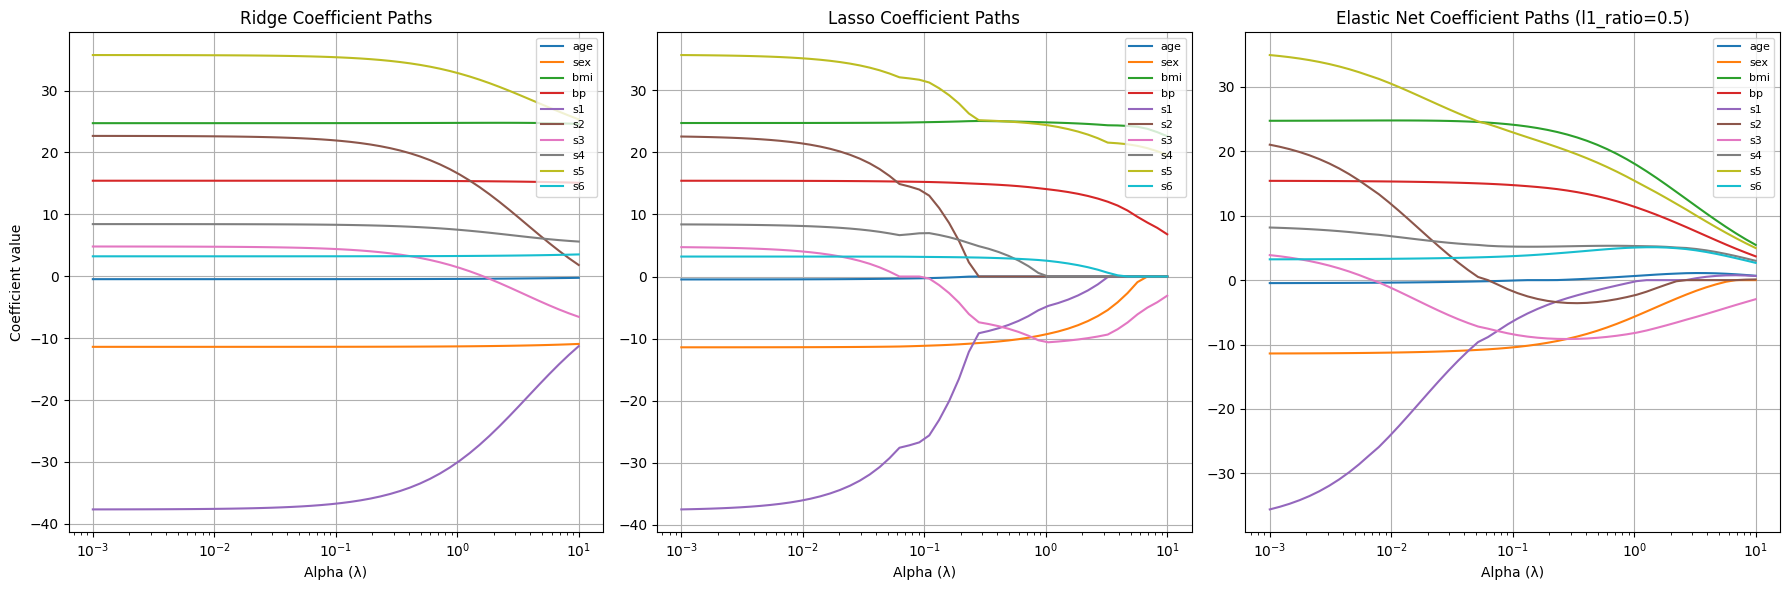

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
X, y = load_diabetes(return_X_y=True)
feature_names = load_diabetes().feature_names

# Standardize features (important for regularization!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define alpha values (regularization strength)
alphas = np.logspace(-3, 1, 50)

# To store coefficients
coefs_ridge = []
coefs_lasso = []
coefs_enet = []

# Fit models and store coefficients
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha, max_iter=10000)
    enet = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=10000)

    ridge.fit(X_scaled, y)
    lasso.fit(X_scaled, y)
    enet.fit(X_scaled, y)

    coefs_ridge.append(ridge.coef_)
    coefs_lasso.append(lasso.coef_)
    coefs_enet.append(enet.coef_)

# Convert to arrays
coefs_ridge = np.array(coefs_ridge)
coefs_lasso = np.array(coefs_lasso)
coefs_enet = np.array(coefs_enet)

# Plotting
plt.figure(figsize=(18, 6))

# Ridge
plt.subplot(1, 3, 1)
for i in range(X.shape[1]):
    plt.plot(alphas, coefs_ridge[:, i], label=feature_names[i])
plt.xscale('log')
plt.xlabel('Alpha (λ)')
plt.ylabel('Coefficient value')
plt.title('Ridge Coefficient Paths')
plt.grid(True)
plt.legend(loc='upper right', fontsize=8)

# Lasso
plt.subplot(1, 3, 2)
for i in range(X.shape[1]):
    plt.plot(alphas, coefs_lasso[:, i], label=feature_names[i])
plt.xscale('log')
plt.xlabel('Alpha (λ)')
plt.title('Lasso Coefficient Paths')
plt.grid(True)
plt.legend(loc='upper right', fontsize=8)

# Elastic Net
plt.subplot(1, 3, 3)
for i in range(X.shape[1]):
    plt.plot(alphas, coefs_enet[:, i], label=feature_names[i])
plt.xscale('log')
plt.xlabel('Alpha (λ)')
plt.title('Elastic Net Coefficient Paths (l1_ratio=0.5)')
plt.grid(True)
plt.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()


### How to Interpret the Output

**Ridge:**

- All coefficients shrink smoothly as alpha increases.

- No feature is eliminated (i.e., all lines remain non-zero).

**Lasso:**

- Some coefficients drop to zero as regularization increases.

- Helps identify which features are likely unimportant.

**Elastic Net:**

- Behaves like a hybrid: it shrinks coefficients and may zero some out.

- More stable than Lasso when features are correlated.